In [1]:
import pandas as pd
import matplotlib.pyplot as mp
df = pd.read_excel('../data/Portfolio_by_School_Type.xls')

In [2]:
# Drop NA values, add a new row, and rename columns to make sense
df = df.drop([0, 1, 2, 3, 32, 33, 34, 35])
new_row = {"Federal Student Loan Portfolio by School Type": 0, "Unnamed: 1": '', "Unnamed: 2": 0, "Unnamed: 3" : 0, "Unnamed: 4": 0, "Unnamed: 5": 0, "Unnamed: 6" : 0, "Unnamed: 7": 0, "Unnamed: 8": 0, "Unnamed: 9" : 0, "Unnamed: 10": 0, "Unnamed: 11" : 0}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
df.rename(columns={"Unnamed: 1": "Quarter", "Unnamed: 2" : "Public inst.", "Unnamed: 3": "Public insts.", "Unnamed: 4" : "Private inst.", "Unnamed: 5" : "Private insts.", "Unnamed: 6" : "Proprietary inst.", "Unnamed: 7": "Proprietary insts.", "Unnamed: 8" : "Foreign inst.", "Unnamed: 9": "Foreign insts.", "Unnamed: 10" : "Other inst.", "Unnamed: 11": "Other insts."}, inplace=True)
df = df.drop(columns=['Foreign inst.', 'Foreign insts.'])

In [3]:
# Sum all the numbers for each quarter and into 1 year of data
# ie, 4 quarters for 2018 will be summed and now appear as one row of data

flag = 2017
temp_master = df.iloc[28, :]
count = 0

temp = temp_master
for i in range(1, len(df)):
    if(flag == df.iloc[i, 0]):
        temp = temp.add(df.iloc[i, :])
        count = count + 1
        if(flag == 2023 and count == 4):
            temp = temp.add(df.iloc[i, :])
    else:
        df = pd.concat([df, pd.DataFrame([temp])], ignore_index=True)
        temp = temp_master
        temp = temp.add(df.iloc[i, :])
        count = 0
        flag = df.iloc[i, 0]


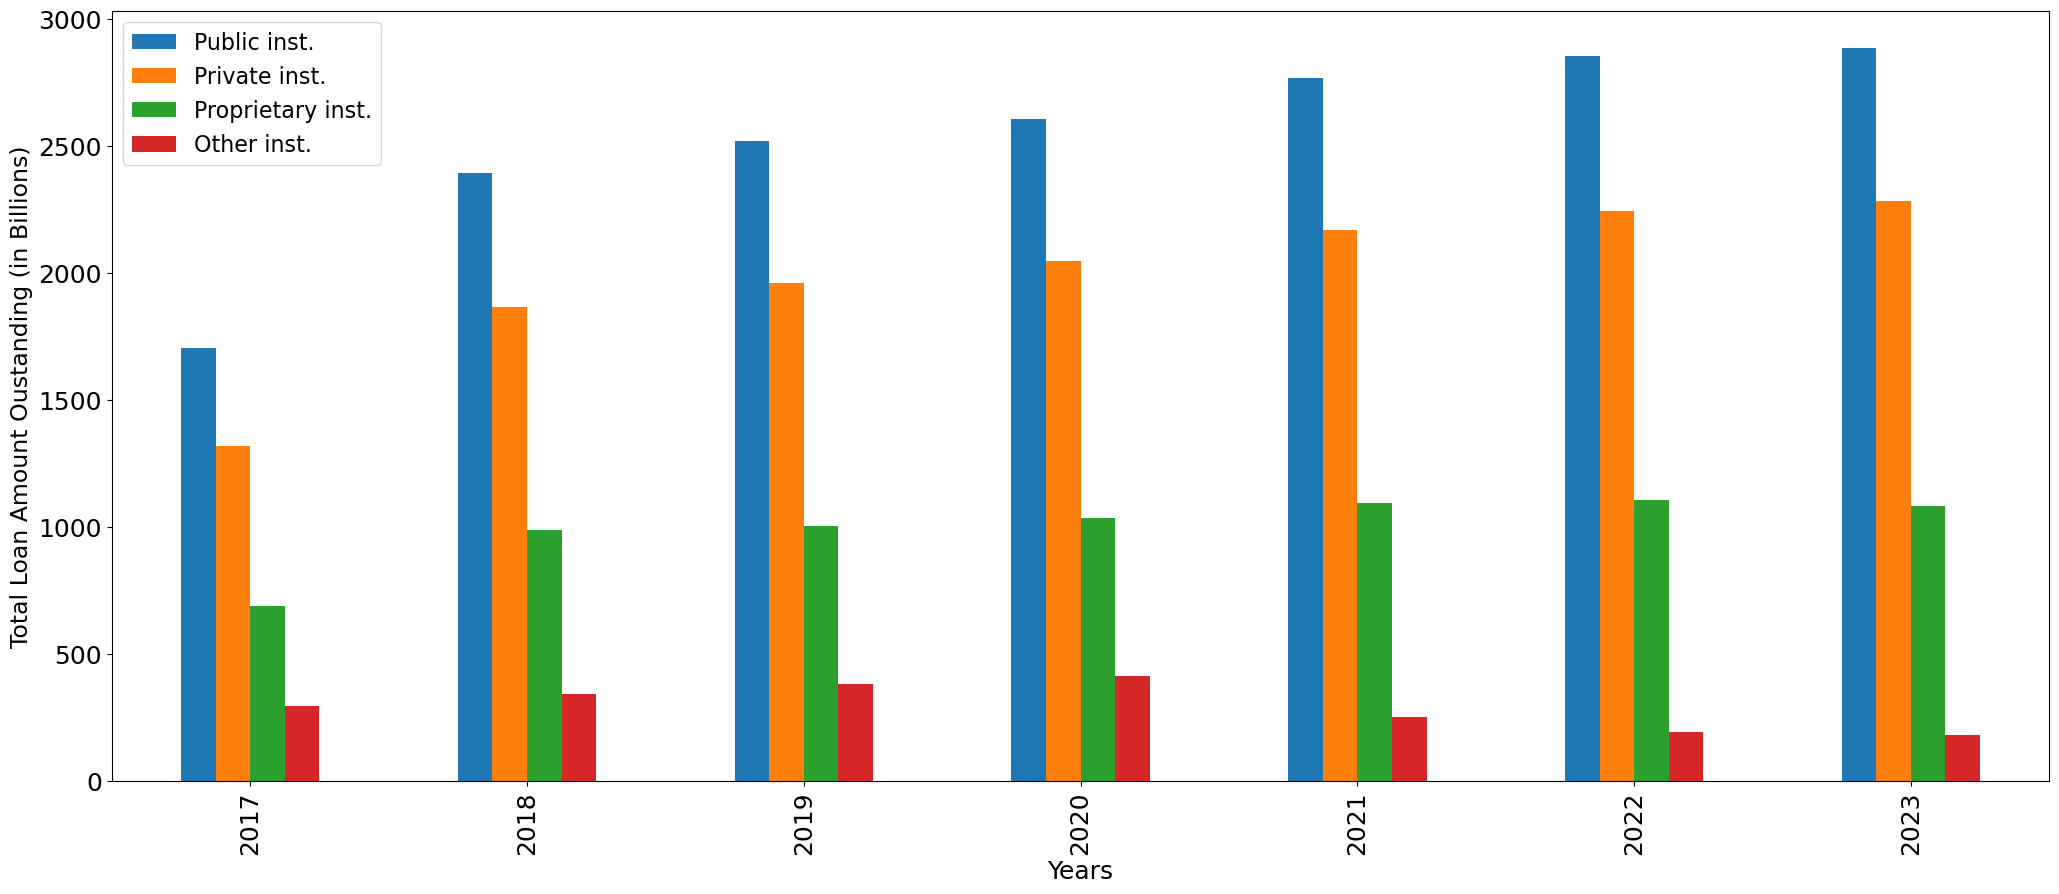

In [4]:
# Take only those rows that have summed years data
df2 = df.iloc[29:36, :]
school_type = pd.DataFrame(df2)

# As the years also have been summed, divide by number of quarters to have the right year
for i in range(0, len(school_type)):
    if(i != 0):
        school_type.iloc[i, 0] = int(school_type.iloc[i, 0]/4)
    else:
        school_type.iloc[i, 0] = int(school_type.iloc[i, 0]/3)

# plot graphs
amount_borrowed_df = school_type.loc[:, ['Federal Student Loan Portfolio by School Type', 'Public inst.', 'Private inst.', 'Proprietary inst.', 'Other inst.']]
ax1 = amount_borrowed_df.plot.bar(x = 'Federal Student Loan Portfolio by School Type', y = ['Public inst.', 'Private inst.', 'Proprietary inst.', 'Other inst.'], figsize=(25, 10), xlabel="Years", ylabel="Borrowed Amount (in Billions)")
ax1.legend(fontsize=16)
ax1.set_xlabel('Years', fontdict={'fontsize': 18})
ax1.set_ylabel('Total Loan Amount Oustanding (in Billions)', fontdict={'fontsize': 17})
ax1.tick_params(axis = 'x', labelsize=18)
ax1.tick_params(axis = 'y', labelsize=18)
